In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

main_dir = 'C:\\Users\\Georgios\\Downloads\\clustering4ccerRevision\\journal\\new\\'
df = pd.read_csv(main_dir + 'schemaBasedEmbeddingsAnalysisCleanFinalTimes.csv', sep='|')
df

,Dataset,Attribute Name,Embeddings,Similarity Measure,Duplicates Type,Valid Pairs,Average Characters D1,Average Tokens D1,Coverage D1,Average Characters D2,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,Name,FastText,Cosine Similarity,Scarce,339387,11,2,0.67,11,...,0.921,0.804,0.65,35,0.795,0.787,0.791,0.95,13,Right
1,Restaurants,Name,FastText,Euclidean Distance,Scarce,339678,11,2,0.67,11,...,0.888,0.819,0.30,25,0.802,0.820,0.811,0.40,12,Right
2,Restaurants,Name,FastText,WMD,Scarce,339678,11,2,0.67,11,...,0.775,0.645,0.95,90,0.305,0.775,0.438,0.95,89,Right
3,Restaurants,Name,Albert,Cosine Similarity,Scarce,268054,11,2,0.67,11,...,0.775,0.704,0.95,15,0.527,0.775,0.627,0.95,5,Right
4,Restaurants,Name,Albert,Euclidean Distance,Scarce,339678,11,2,0.67,11,...,0.753,0.779,0.95,17,0.807,0.753,0.779,0.95,4,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,DBLP-Scholar,Title,Albert,Cosine Similarity,One-sided,153738496,56,8,1.00,60,...,0.695,0.711,0.95,9131,0.687,0.698,0.692,0.95,2550,Right
66,DBLP-Scholar,Title,Albert,Euclidean Distance,One-sided,154364148,56,8,1.00,60,...,0.654,0.783,0.15,7583,0.953,0.652,0.774,0.15,1411,Right
67,DBLP-Scholar,Title,Albert,WMD,One-sided,154364148,56,8,1.00,60,...,0.639,0.690,0.95,8513,0.730,0.640,0.682,0.95,1782,Right
68,Movies,Title,FastText,Cosine Similarity,Balanced,378388014,18,3,1.00,24,...,0.463,0.604,0.60,36860,0.751,0.486,0.590,0.65,11199,Right


In [2]:
runtimes = pd.DataFrame()
runtimes['Dataset'] = df['Dataset']

for column in df:
    if (0 < column.find('Run-time')):
#         if (column.find('BAH') < 0):
        runtimes[column] = df[column]

runtimes.columns = ['Dataset', 'CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
runtimes

,Dataset,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
0,Restaurants,9,29,16,1950,9,24,35,13
1,Restaurants,4,13,6,1981,5,5,25,12
2,Restaurants,53,135,9,1881,23,59,90,89
3,Restaurants,3,9,6,1882,5,3,15,5
4,Restaurants,2,6,7,1859,4,3,17,4
...,...,...,...,...,...,...,...,...,...
65,DBLP-Scholar,1570,3774,2531,145916,1183,1584,9131,2550
66,DBLP-Scholar,849,1226,2387,150025,1113,980,7583,1411
67,DBLP-Scholar,882,1557,2045,151492,970,1107,8513,1782
68,Movies,2249,3529,25828,128015,2942,3124,36860,11199


In [4]:
datasets = ['Restaurants', 'Abt-Buy', 'Amazon-Google Products', 'DBLP-ACM', 'IMDB-TMDB', 
            'IMDB-TVDB', 'TMDB-TVDB', 'Walmart-Amazon', 'DBLP-Scholar', 'Movies']

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

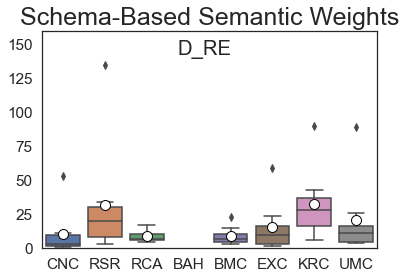

In [6]:
dataset_df = runtimes[runtimes['Dataset']==datasets[0]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Based Semantic Weights", fontsize = 25)
plt.suptitle('D_RE',  y=0.85)
plt.ylim(0, 160)
plt.savefig(main_dir + 'sbseD1RT.eps', format='eps')

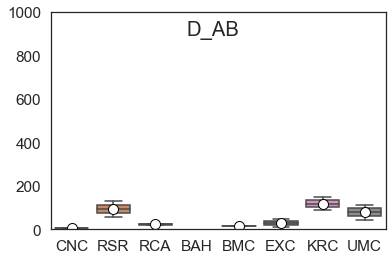

In [7]:
dataset_df = runtimes[runtimes['Dataset']==datasets[1]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_AB',  y=0.85)
plt.ylim(0, 1000)
plt.savefig(main_dir + 'sbseD2RT.eps', format='eps')

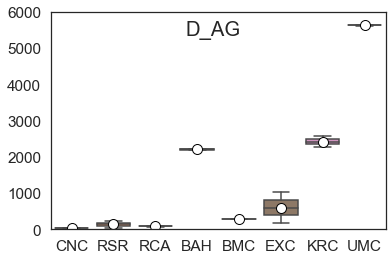

In [9]:
dataset_df = runtimes[runtimes['Dataset']==datasets[2]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_AG',  y=0.85)
plt.ylim(0, 6000)
plt.savefig(main_dir + 'sbseD3RT.eps', format='eps')

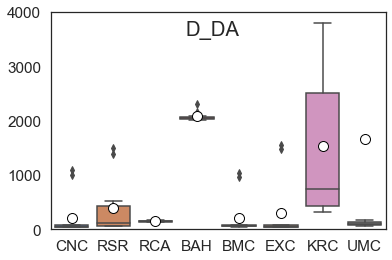

In [10]:
dataset_df = runtimes[runtimes['Dataset']==datasets[3]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_DA',  y=0.85)
plt.ylim(0, 4000)
plt.savefig(main_dir + 'sbseD4RT.eps', format='eps')

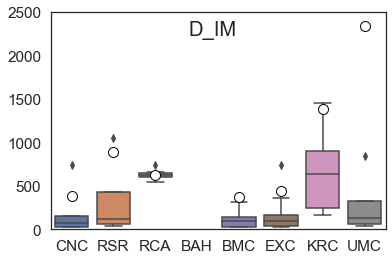

In [11]:
dataset_df = runtimes[runtimes['Dataset']==datasets[4]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_IM',  y=0.85)
plt.ylim(0, 2500)
plt.savefig(main_dir + 'sbseD5RT.eps', format='eps')

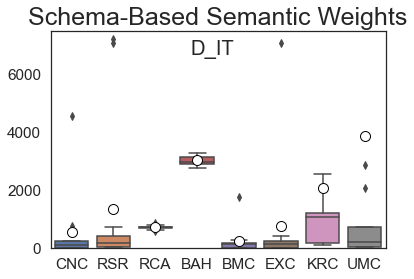

In [12]:
dataset_df = runtimes[runtimes['Dataset']==datasets[5]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Based Semantic Weights", fontsize = 25)
plt.suptitle('D_IT',  y=0.85)
plt.ylim(0, 7500)
plt.savefig(main_dir + 'sbseD6RT.eps', format='eps')

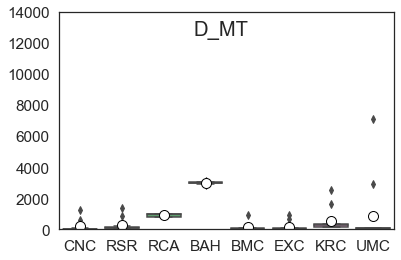

In [13]:
dataset_df = runtimes[runtimes['Dataset']==datasets[6]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_MT',  y=0.85)
plt.ylim(0, 14000)
plt.savefig(main_dir + 'sbseD7RT.eps', format='eps')

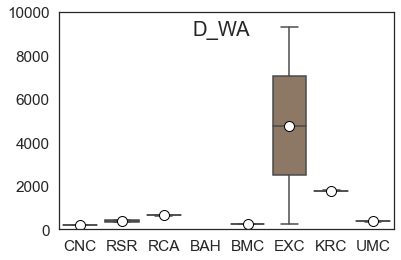

In [15]:
dataset_df = runtimes[runtimes['Dataset']==datasets[7]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_WA',  y=0.85)
plt.ylim(0, 10000)
plt.savefig(main_dir + 'sbseD8RT.eps', format='eps')

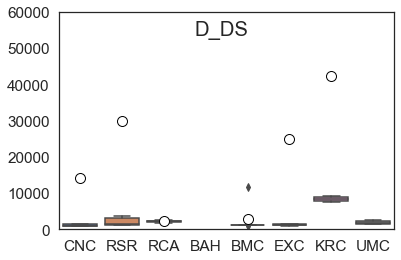

In [16]:
dataset_df = runtimes[runtimes['Dataset']==datasets[8]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_DS',  y=0.85)
plt.ylim(0, 60000)
plt.savefig(main_dir + 'sbseD9RT.eps', format='eps')

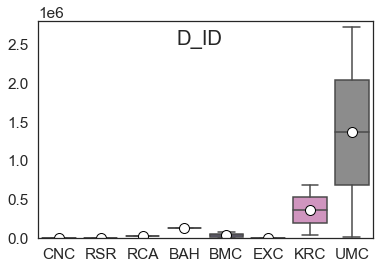

In [19]:
dataset_df = runtimes[runtimes['Dataset']==datasets[9]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.suptitle('D_ID',  y=0.85)
plt.ylim(0, 2800000)
plt.savefig(main_dir + 'sbseD10RT.eps', format='eps')